In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')  # For sentence tokenization
nltk.download('stopwords')  # Download stop words
nltk.download('vader_lexicon')  # For VADER sentiment analysis

# Load your data (adjust if necessary)
df = pd.read_csv("google.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df

,NBa7we src,d4r55,RfnDt,eaLgGf,hCCjke,rsqaWe,wiI7pd,w8nwRe,dSlJg,Hzvxle,pkWtMe,dSlJg 2,znYl0,W8gobe,znYl0 2,nM6d2c,DZSIDd,wiI7pd 2,w8nwRe 2,RfDO5c
0,https://lh3.googleusercontent.com/a-/ALV-UjXPx...,Shaikh 01,Local Guide · 9 reviews · 3 photos,,,2 months ago,Excellent customer service\nFood given to hot ...,More,,Like,1.0,,Share,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://lh3.googleusercontent.com/a-/ALV-UjV1u...,aarti Gupta,3 reviews · 1 photo,,,3 weeks ago,"My favourite outlet for hangout, this place is...",More,,NaN,NaN,,Share,New,Like,Response from the owner,3 weeks ago,"Hi ,\n\nThanks for the appreciation. We always...",NaN,NaN
2,https://lh3.googleusercontent.com/a-/ALV-UjWsQ...,Sheefa Shaikh,2 reviews,,,a week ago,"The ambiance is superb, I highly recommend thi...",More,,NaN,NaN,,Like,New,Share,Response from the owner,a week ago,"Hi , \n\nThanks for the appreciation! We do ou...",More,NaN
3,https://lh3.googleusercontent.com/a-/ALV-UjVwm...,Kshitija Narkar,Local Guide · 53 reviews · 4 photos,,,6 months ago,Great food good service but always full place ...,More,,NaN,NaN,,Share,NaN,Like,NaN,NaN,NaN,NaN,Service…
4,https://lh3.googleusercontent.com/a-/ALV-UjWB7...,Sunny Mallah,3 reviews · 2 photos,,,a month ago,Store is very reliable towards all the custome...,More,,NaN,NaN,,Like,NaN,Share,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,https://lh3.googleusercontent.com/a-/ALV-UjXya...,SWAMI CATERERS,Local Guide · 29 reviews · 142 photos,,,a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,https://lh3.googleusercontent.com/a-/ALV-UjVS2...,KarthicGhanesh Muthaphan,2 reviews,,,7 months ago,NaN,More,,NaN,NaN,,Like,NaN,Share,NaN,NaN,NaN,NaN,5
441,https://lh3.googleusercontent.com/a/ACg8ocJr9_...,Aditi Mehta,Local Guide · 22 reviews · 8 photos,,,a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,https://lh3.googleusercontent.com/a-/ALV-UjVJg...,Kiran Pawar,1 review,,,a week ago,NaN,More,,NaN,NaN,,Like,New,Share,Response from the owner,a week ago,"Hi ,\n\nThanks for the appreciation. It's alwa...",NaN,Service


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NBa7we src  430 non-null    object 
 1   d4r55       430 non-null    object 
 2   RfnDt       393 non-null    object 
 3   eaLgGf      430 non-null    object 
 4   hCCjke      430 non-null    object 
 5   rsqaWe      430 non-null    object 
 6   wiI7pd      210 non-null    object 
 7   w8nwRe      317 non-null    object 
 8   dSlJg       386 non-null    object 
 9   Hzvxle      25 non-null     object 
 10  pkWtMe      25 non-null     float64
 11  dSlJg 2     386 non-null    object 
 12  znYl0       368 non-null    object 
 13  W8gobe      48 non-null     object 
 14  znYl0 2     379 non-null    object 
 15  nM6d2c      111 non-null    object 
 16  DZSIDd      111 non-null    object 
 17  wiI7pd 2    111 non-null    object 
 18  w8nwRe 2    57 non-null     object 
 19  RfDO5c      292 non-null    o

In [ ]:
df = df.iloc[:, 5:]

In [ ]:
df

,rsqaWe,wiI7pd,w8nwRe,dSlJg,Hzvxle,pkWtMe,dSlJg 2,znYl0,W8gobe,znYl0 2,nM6d2c,DZSIDd,wiI7pd 2,w8nwRe 2,RfDO5c
0,2 months ago,Excellent customer service\nFood given to hot ...,More,,Like,1.0,,Share,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3 weeks ago,"My favourite outlet for hangout, this place is...",More,,NaN,NaN,,Share,New,Like,Response from the owner,3 weeks ago,"Hi ,\n\nThanks for the appreciation. We always...",NaN,NaN
2,a week ago,"The ambiance is superb, I highly recommend thi...",More,,NaN,NaN,,Like,New,Share,Response from the owner,a week ago,"Hi , \n\nThanks for the appreciation! We do ou...",More,NaN
3,6 months ago,Great food good service but always full place ...,More,,NaN,NaN,,Share,NaN,Like,NaN,NaN,NaN,NaN,Service…
4,a month ago,Store is very reliable towards all the custome...,More,,NaN,NaN,,Like,NaN,Share,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,7 months ago,NaN,More,,NaN,NaN,,Like,NaN,Share,NaN,NaN,NaN,NaN,5
441,a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,a week ago,NaN,More,,NaN,NaN,,Like,New,Share,Response from the owner,a week ago,"Hi ,\n\nThanks for the appreciation. It's alwa...",NaN,Service


In [ ]:
df.drop(df.columns.difference(['wiI7pd 2']), 1, inplace=True)

<ipython-input-12-6cffc74475b9>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['wiI7pd 2']), 1, inplace=True)


In [ ]:
df

,wiI7pd 2
0,NaN
1,"Hi ,\n\nThanks for the appreciation. We always..."
2,"Hi , \n\nThanks for the appreciation! We do ou..."
3,NaN
4,NaN
...,...
439,NaN
440,NaN
441,NaN
442,"Hi ,\n\nThanks for the appreciation. It's alwa..."


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,wiI7pd 2
1,"Hi ,\n\nThanks for the appreciation. We always..."
2,"Hi , \n\nThanks for the appreciation! We do ou..."
5,"Hi ,\n\nThanks for the appreciation. It's alwa..."
9,"Hi ,\n\nThanks for the appreciation. It's alwa..."
11,"Hi , \n\nThanks for the appreciation! We do ou..."
...,...
431,"Hi, We'd like to know the reason behind such l..."
432,"Hi , \n\nThanks for the appreciation! We do ou..."
436,"Hi Shreya,\n\nWe'd like to know the reason beh..."
437,"Hi ,\n\nThanks for the appreciation. It's alwa..."


In [ ]:
df['wiI7pd 2'] = df['wiI7pd 2'].str.replace("\n", " ")

In [ ]:
df = df.rename(columns={"wiI7pd 2": "Reviews"})

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    words = nltk.word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]  # Remove stop words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]  # Stemming
    return " ".join(words)

df['Cleaned_Review'] = df['Reviews'].apply(preprocess_text)

In [ ]:
from textblob import TextBlob

nltk.download('vader_lexicon') # May need downloading first time

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment'] = df['Reviews'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment_nltk(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_NLTK'] = df['Cleaned_Review'].apply(get_sentiment_nltk)

<Axes: >

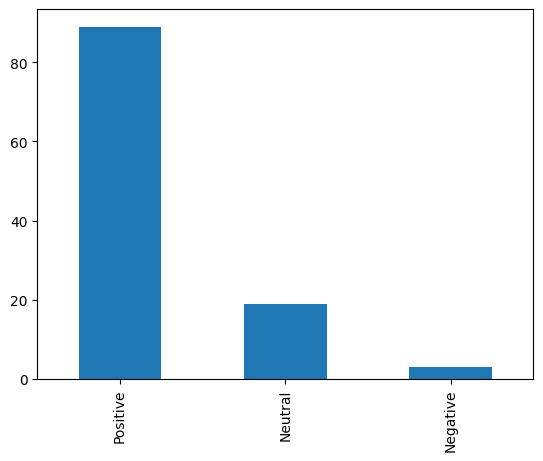

In [ ]:
df['Sentiment_NLTK'].value_counts().plot(kind='bar')


In [ ]:
from nltk import FreqDist

all_words = ' '.join(df['Cleaned_Review'])
word_dist = FreqDist(all_words.split())
top_words = word_dist.most_common(20)

[(',', 113), ('hi', 111), ('.', 104), ('!', 75), ('thank', 58), ('…', 57), ('appreci', 44), ('alway', 31), ('pleas', 31), ('custom', 30), ('share', 30), ('delight', 29), ('know', 28), ('myfeedback', 22), ('@', 22), ('mcdonaldsindia.com', 22), ('rate', 21), ('us', 21), ('sorri', 19), ('serv', 18)]


In [ ]:
print(pd.DataFrame(top_words, columns=['Word', 'Frequency']).to_string(index=False))

              Word  Frequency
                 ,        113
                hi        111
                 .        104
                 !         75
             thank         58
                 …         57
           appreci         44
             alway         31
             pleas         31
            custom         30
             share         30
           delight         29
              know         28
        myfeedback         22
                 @         22
mcdonaldsindia.com         22
              rate         21
                us         21
             sorri         19
              serv         18


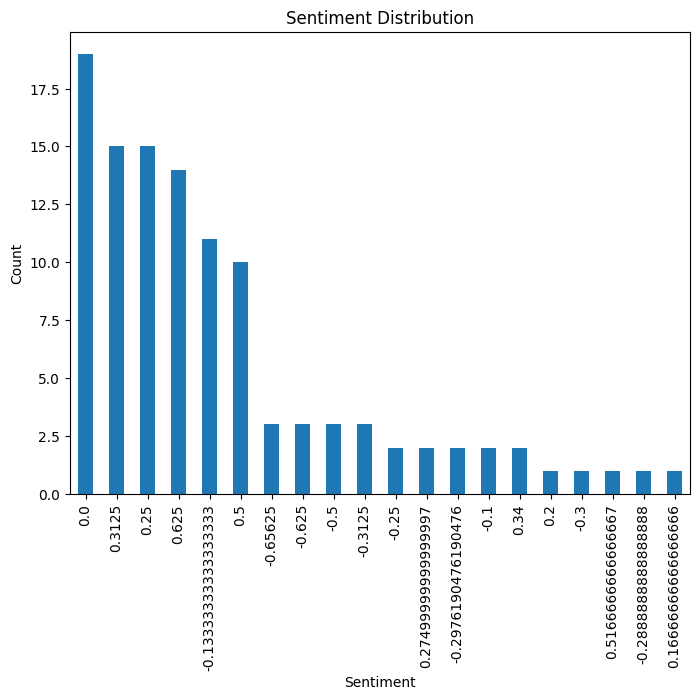

<Figure size 1000x600 with 0 Axes>

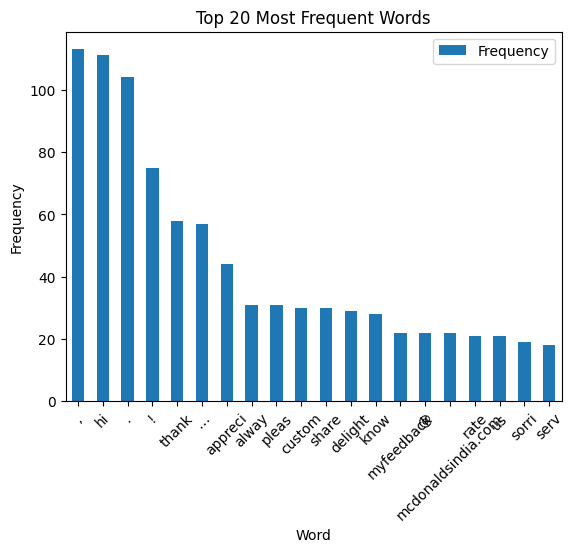

In [ ]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
top_words_df.plot.bar(x='Word', y='Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()